In [182]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pp
from  sklearn import preprocessing
%matplotlib inline

In [183]:
#loading data
data=pd.read_excel('data_complete_shuffled.xls')
data

,Crop,year,Area Harvested - Ha,Production Quantity - tonnes,Yield - Hg/Ha
0,grape,1993,6000,1200000,18432
1,rice,1978,6300000,73352000,19623
2,barley,1985,70000,104225008,258628
3,tomato,1963,434000,24734608,343061
4,pineapple,1998,12572000,246806,137248
5,tea,2003,39825,201600,661458
6,tea,1993,150000,225569200,81301
7,pineapple,1963,111000,140603504,123639
8,banana,1971,45977,37910,10611
9,banana,1980,1482800,72156200,19972


In [184]:
#prediction will be done according to different crops as one will not 
#depend on other and hence distort the graph for others.
crop_name='papaya' #let, this variable will be used always
#filter data according to crop_name
data=data.loc[data['Crop']==crop_name]
#now sorted so that we could only take last 10 years to predict next
data=data.sort_values(by='year',ascending=True).drop('Crop',axis=1).drop('Production Quantity - tonnes',axis=1).drop('year',axis=1)
data.tail()

,Area Harvested - Ha,Yield - Hg/Ha
443,10830,15079
237,2953200,17614
213,1401400,89062
469,87200,125000
501,282000,91428


In [185]:
#NOT NEEDED as we have filtered above according to crop and removed 'Crop' column

# #creating labelEncoder
# encoder=preprocessing.LabelEncoder()#creating object
# encoder.fit(data['Crop'])#fitting 'string labels' with encode as integers
# #transform - convert string to number, inverse_transform -convert number to string
# X['crop']=encoder.transform(data['Crop'])
# #encoder.inverse_transform(0)
# #removing the X['Crop'] column
# X.drop(inplace=True,axis=1,labels='Crop')


In [186]:
model=LinearRegression()

In [187]:
X,y=data.iloc[:,0:-1],data.iloc[:,-1:]
X# all columns other than last
y#only last column, Yeild

,Yield - Hg/Ha
560,8267
510,33029
435,13232
206,145555
192,10814
618,84409
384,11687
578,561597
37,16922
576,11719


In [188]:
Xdas=X[-10:-5]
ydas=y[-10:-5]#last 10
ydas

,Yield - Hg/Ha
560,8267
510,33029
435,13232
206,145555
192,10814
618,84409
384,11687
578,561597
37,16922
576,11719


In [189]:
"""
as fit() method can't use 'string' and out "Crop" column has string so we have to transform into intergers
method 1 - find number of classes and assign unique id manually
method 2 - let python do that for us ,using 'labelEncoder' class
"""
model.fit(Xdas,ydas)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
#model.score(X[-5:],y[-5:])

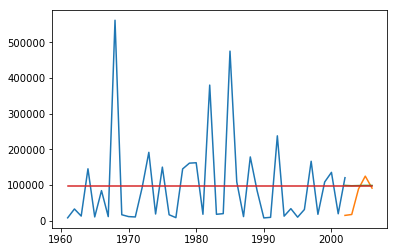

In [191]:
pp.plot([i+1961 for i in range(42)],y[:-5])
pp.plot([i+2002 for i in range(5)],y[-5:])
pp.plot([i+2002 for i in range(5)],model.predict(X[-5:]))
import numpy as np  
import matplotlib.pyplot as pp 
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    pp.plot(x, y)  
    pp.show()
graph('-0.0010307*x+96645.9754983',range(1961,2007))   

In [192]:
model.intercept_
#model.coef_

array([ 98991.45476146])

In [193]:
#l=data.loc[data['Crop']=='tea'][['year','Yield - Hg/Ha']]

In [194]:
# l.sort_values(by='year',inplace=True)
# l

# pp.plot(l['year'],l['Yield - Hg/Ha'])

# m=l.iloc[-10:]
# pp.scatter(m['year'],m['Yield - Hg/Ha'])